## Ph√¢n t√≠ch xu h∆∞·ªõng s·ªü th√≠ch √¢m nh·∫°c

#### Import c√°c th∆∞ vi·ªán v√† c√°c package c·∫ßn thi·∫øt

In [20]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

#### Load d·ªØ li·ªáu

In [ ]:
df_normal  = pd.read_csv('list_info_03.csv') # Load c√°c th√¥ng tin c√°c video v·ªÅ √¢m nh·∫°c th∆∞·ªùng
# df = pd.read_csv('list_info_trending.csv') # Load th√¥ng tin c√°c video v·ªÅ √¢m nh·∫°c trending
df_normal.head()


In [ ]:
# Xem th√¥ng tin t·ªïng quan v·ªÅ data frame
df_normal.info()

In [4]:
# L·ªçc ra c√°c video √¢m nh·∫°c t·ª©c categoryId l√† 10 - Music
df_normal = df_normal[df_normal['categoryId']==10]

In [ ]:
# X·ª≠ l√Ω c√°c gi√° tr·ªã null trong data frame
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

In [9]:
# M√¥ t·∫£ c√°c thu·ªôc t√≠nh c√≥ gi√° tr·ªã nguy√™n
df_normal.describe()

categoryId     viewCount     likeCount  dislikeCount  favoriteCount  \
count      3250.0  3.250000e+03  2.742000e+03           0.0         3250.0   
mean         10.0  7.757448e+06  1.767001e+05           NaN            0.0   
std           0.0  4.465801e+07  8.834424e+05           NaN            0.0   
min          10.0  0.000000e+00  0.000000e+00           NaN            0.0   
25%          10.0  7.630100e+04  1.056250e+03           NaN            0.0   
50%          10.0  3.032205e+05  4.079500e+03           NaN            0.0   
75%          10.0  1.666436e+06  3.117650e+04           NaN            0.0   
max          10.0  1.201917e+09  2.083092e+07           NaN            0.0   

       commentCount  
count  3.212000e+03  
mean   1.735291e+04  
std    2.045653e+05  
min    0.000000e+00  
25%    2.100000e+01  
50%    9.400000e+01  
75%    6.162500e+02  
max    8.776885e+06

In [9]:
# V·∫Ω bi·ªÉu ƒë·ªì tr√≤n th·ªëng k√™ theo s·ªë view c·ªßa c√°c video
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video chuc nghin view', 'Video tram nghin view', 'Video trieu view', 'Video chuc trieu view', 'Video tram trieu view']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


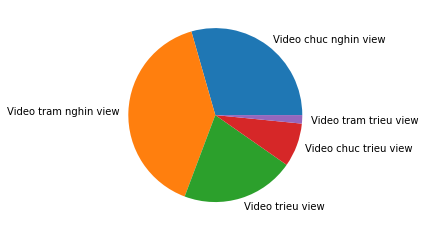

In [10]:
pieCharViewCounts(df_normal)

#### X·ª≠ l√Ω tag v√† t√™n channel (th√™m "_" v√†o c√°c tag)


In [12]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [11]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [ ]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

#### X·ª≠ l√Ω topic categories

In [15]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [ ]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

In [ ]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

#### X·ª≠ l√Ω th·ªùi gian 

In [15]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [16]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [ ]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

#### X·ª≠ l√Ω t√™n video 

In [18]:
# H√†m x√≥a b·ªè m·ªôt s·ªë t·ª´ g√¢y nhi·ªÖu
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### X·ª≠ l√Ω gi√° tr·ªã c√°c c·ªôt v·ªÅ s·ªë nguy√™n

In [21]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [ ]:
df_normal_preprocessed.head()

#### Ph√¢n t√≠ch m·ªôt s·ªë m·ªëi quan h·ªá 

##### Ph√¢n ph·ªëi c√°c video theo s·ªë view, like

(array([2.688e+03, 3.000e+01, 1.400e+01, 4.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([       0. ,  2083092.5,  4166185. ,  6249277.5,  8332370. ,
        10415462.5, 12498555. , 14581647.5, 16664740. , 18747832.5,
        20830925. ]),
 <BarContainer object of 10 artists>)

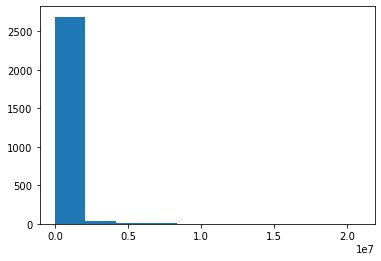

In [23]:
plt.hist(df_normal['likeCount'])

(array([1758.,  186.,  103.,   58.,   61.,   36.,   37.,   32.,   19.,
          20.]),
 array([    0. ,  9994.1, 19988.2, 29982.3, 39976.4, 49970.5, 59964.6,
        69958.7, 79952.8, 89946.9, 99941. ]),
 <BarContainer object of 10 artists>)

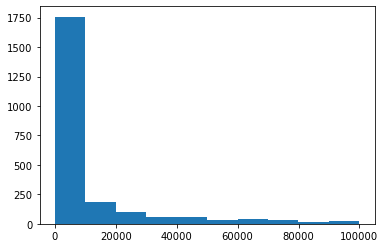

In [24]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

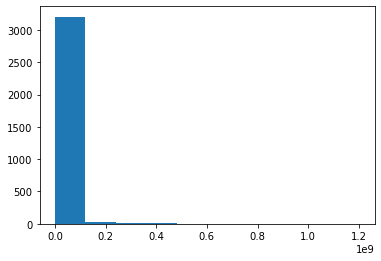

In [25]:
plt.hist(df_normal['viewCount']);

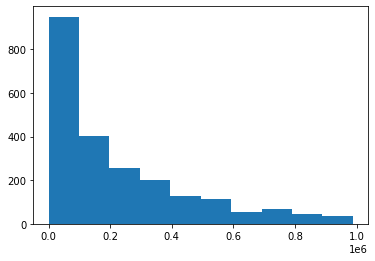

In [26]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([3.09e+03, 1.09e+02, 6.00e+00, 4.00e+00, 5.00e+00, 1.00e+00,
        4.00e+00, 3.00e+00, 3.00e+00, 2.50e+01]),
 array([    0. ,  8637.9, 17275.8, 25913.7, 34551.6, 43189.5, 51827.4,
        60465.3, 69103.2, 77741.1, 86379. ]),
 <BarContainer object of 10 artists>)

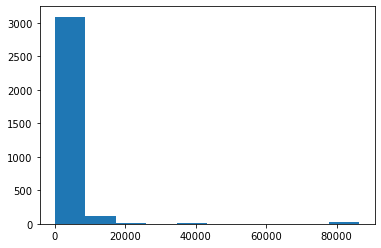

In [27]:
plt.hist(df_normal_preprocessed['durationInt'])

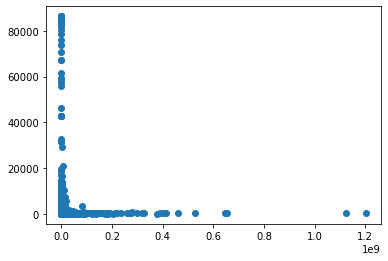

In [28]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

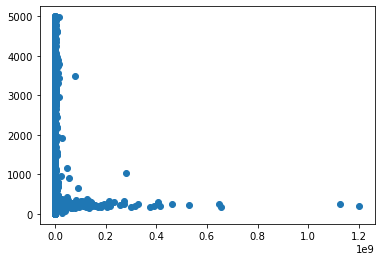

In [29]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


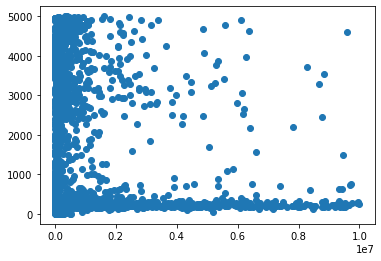

In [30]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### Quan h·ªá gi·ªØa c√°c thu·ªôc t√≠nh

In [ ]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

In [32]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 4960
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3250 non-null   object 
 1   publishAt             3250 non-null   object 
 2   title                 3250 non-null   object 
 3   description           3250 non-null   object 
 4   channelTitle          3250 non-null   object 
 5   tags                  3250 non-null   object 
 6   categoryId            3250 non-null   int64  
 7   defaultAudioLanguage  3250 non-null   object 
 8   duration              3250 non-null   object 
 9   dimension             3250 non-null   object 
 10  definition            3250 non-null   int32  
 11  caption               3250 non-null   int64  
 12  privacyStatus         3250 non-null   int32  
 13  embeddable            3250 non-null   int64  
 14  madeForKids           3250 non-null   int64  
 15  viewCount            

<AxesSubplot:>

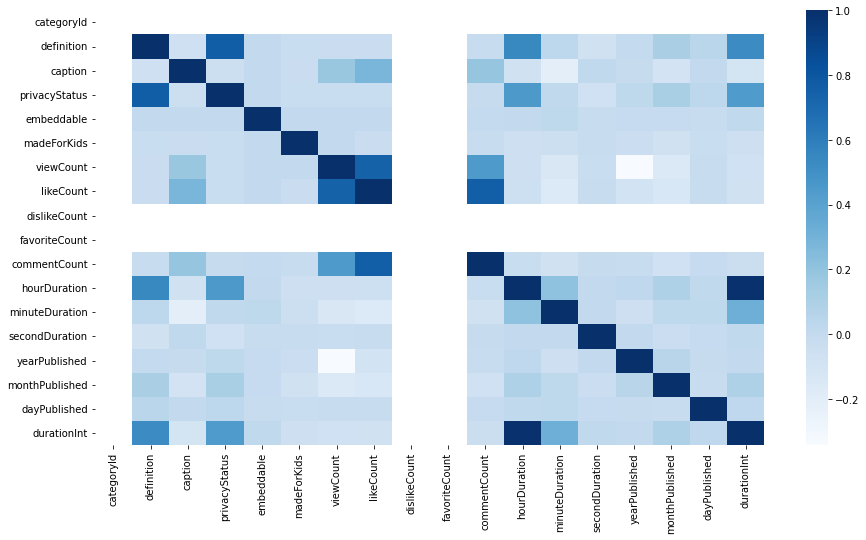

In [33]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

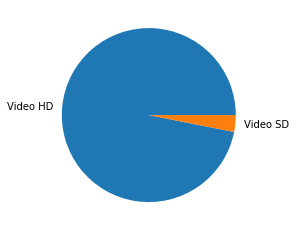

In [64]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

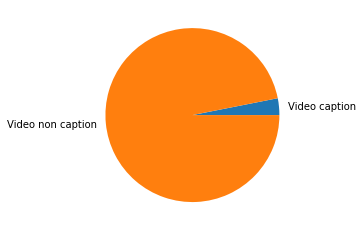

In [67]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

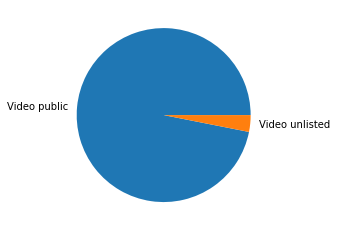

In [69]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

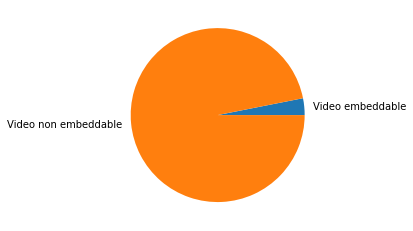

In [71]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

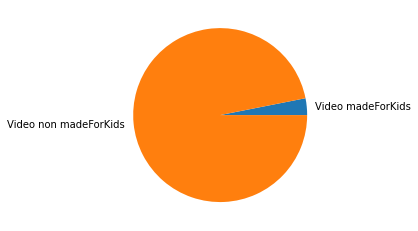

In [75]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Chuy·ªÉn text th√†nh vector IF TDF

In [34]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # H√†m th·ª±c hi·ªán chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu text th√†nh d·ªØ li·ªáu s·ªë d·∫°ng ma tr·∫≠n 
    # Input: D·ªØ li·ªáu 2 chi·ªÅu d·∫°ng numpy.array, m·∫£ng nh√£n id d·∫°ng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nS·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn: {len(module_count_vector.vocabulary_)}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi x·ª≠ l√Ω: {data_preprocessed.shape}")
    print(f"Xem c√°c t·ª´ trong t·ª´ ƒëi·ªÉn: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [ ]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))

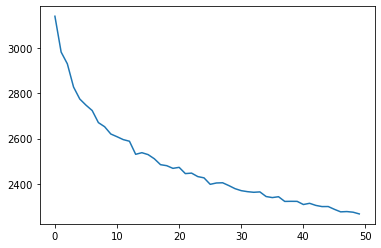

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [97]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00209965, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(3250,)
5
6
6
6
3
6
6
6
6
6
6
6
8
6
6
6
6
6
6
6
6
6
6
5
6
6
6
6
6
6
6
6
8
6
6
6
6
5
6
6
6
3
6
6
6
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
6
6
6
5
8
8
6
6
5
6
6
8
6
6
6
6
8
6
3
6
6
6
8
6
6
6
8
8
3
6
6
3
6
6
6
6
8
6
8
6
6
6
6
6
6
6
6
1
1
1
1
6
1
5
6
1
5
9
5
5
5
7
4
1
5
1
1
1
6
1
6
5
1
2
5
4
1
4
5
4
1
1
1
1
6
1
5
5
9
5
6
7
6
6
1
7
6
6
1
5
7
8
6
6
6
6
2
6
1
5
1
6
6
1
6
1
1
6
1
6
7
6
9
2
1
4
5
6
8
6
6
1
2
8
5
1
6
6
1
6
6
1
1
6
6
6
1
4
8
6
6
8
1
9
8
6
1
1
6
5
6
6
6
5
6
6
7
4
5
6
6
1
2
8
6
6
1
6
1
1
5
5
2
6
7
6
5
6
5
8
8
6
6
2
6
6
6
1
6
6
1
1
8
6
1
6
1
6
6
5
6
5
5
1
1
6
6
6
8
1
6
6
6
6
6
8
6
5
5
6
6
1
6
6
1
6
1
1
6
6
1
6
1
6
6
5
6
6
6
1
5
6
1
8
6
5
6
6
1
6
1
6
8
6
6
8
8
6
6
8
6
6
1
6
8
6
6
6
6
1
1
6
6
1
6
1
6
1
6
1
1
8
6
8
6
6
1
8
8
8
6
8
8
1
8
8
6
6
6
6
8
8
6
6
8
8
8
8
6
6
8
8
6
6
8
5
6
6
6
8
6
6
6
8
8
8
8
6
6
8
8
8
6
6
6
6
6
6
6
6
6
6
6
6
6
0
2
2
0
0
5
0
6
0
0
0
0
6
5
6
0
6
5
0
0
0
0
0
0
5
0
4
0
4
4
0
0
0
4
9
0
6
0
6
0
2
4
0
4
4
4
0
0
4
4
0
0
4
0
4
0
0
9
0
2
4
0
0
5
5
9
9
0
0


In [99]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 4960
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3250 non-null   object 
 1   publishAt             3250 non-null   object 
 2   title                 3250 non-null   object 
 3   description           3250 non-null   object 
 4   channelTitle          3250 non-null   object 
 5   tags                  3250 non-null   object 
 6   categoryId            3250 non-null   int64  
 7   defaultAudioLanguage  3250 non-null   object 
 8   duration              3250 non-null   object 
 9   dimension             3250 non-null   object 
 10  definition            3250 non-null   int32  
 11  caption               3250 non-null   int64  
 12  privacyStatus         3250 non-null   int32  
 13  embeddable            3250 non-null   int64  
 14  madeForKids           3250 non-null   int64  
 15  viewCount            

In [100]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()
      print(wordcloud.words_)



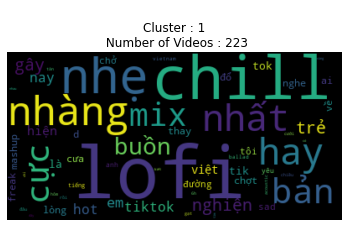

{'lofi': 1.0, 'chill': 0.6504065040650406, 'nh·∫π': 0.4065040650406504, 'nh√†ng': 0.4065040650406504, 'hay': 0.34146341463414637, 'nh·∫•t': 0.3394308943089431, 'b·∫£n': 0.29878048780487804, 'c·ª±c': 0.2804878048780488, 'mix': 0.25609756097560976, 'bu·ªìn': 0.21544715447154472, 'nghi·ªán': 0.19715447154471544, 'g√¢y': 0.1951219512195122, 'tr·∫ª': 0.18699186991869918, 'em': 0.12601626016260162, 'tiktok': 0.11178861788617886, 'hot': 0.10569105691056911, 'nay': 0.1016260162601626, 'hi·ªán': 0.09349593495934959, 'vi·ªát': 0.08536585365853659, 'l√†': 0.07113821138211382, 'tik': 0.07113821138211382, 'tok': 0.07113821138211382, 'thay': 0.06300813008130081, 'l√≤ng': 0.06300813008130081, 'c∆∞a': 0.06300813008130081, 'ƒë·ªï': 0.06300813008130081, 'mashup': 0.06300813008130081, 'ch·ª£t': 0.06097560975609756, 'ai': 0.05894308943089431, 'freak': 0.05894308943089431, 'd': 0.05894308943089431, 'nghe': 0.054878048780487805, 'ƒë∆∞·ªùng': 0.04878048780487805, 't√¥i': 0.04878048780487805, 'ch·ªü': 0.04878

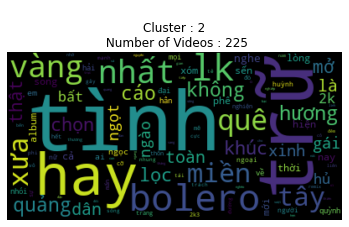

{'t√¨nh': 1.0, 'tr·ªØ': 0.9222614840989399, 'hay': 0.6784452296819788, 'bolero': 0.6431095406360424, 'lk': 0.6219081272084805, 'nh·∫•t': 0.4628975265017668, 'v√†ng': 0.43109540636042404, 'qu√™': 0.36395759717314485, 'x∆∞a': 0.3392226148409894, 'mi·ªÅn': 0.3250883392226148, 't√¢y': 0.3215547703180212, 'h∆∞∆°ng': 0.31802120141342755, 'kh√¥ng': 0.29328621908127206, 'qu·∫£ng': 0.29328621908127206, 'c√°o': 0.28975265017667845, 'kh√∫c': 0.254416961130742, 'ch·ªçn': 0.254416961130742, 'l·ªçc': 0.24734982332155478, 'm·ªü': 0.2226148409893993, 'th·∫≠t': 0.2226148409893993, 'l√†': 0.2049469964664311, 'to√†n': 0.2049469964664311, 'd√¢n': 0.2049469964664311, 'g√°i': 0.18021201413427562, 'xinh': 0.17667844522968199, 'ng·ªçt': 0.16607773851590105, 'ng√†o': 0.16607773851590105, '2k': 0.14840989399293286, 'b·∫•t': 0.14487632508833923, 'h·ªß': 0.14487632508833923, 'nghe': 0.0706713780918728, 's·∫øn': 0.05653710247349823, 'album': 0.053003533568904596, 'hi·ªán': 0.04946996466431095, 'nay': 0.04946996466

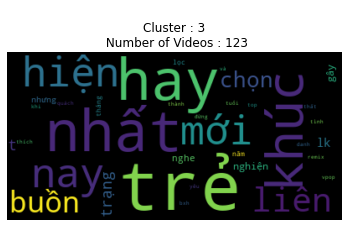

{'tr·∫ª': 1.0, 'hay': 0.6713091922005571, 'nh·∫•t': 0.6685236768802229, 'kh√∫c': 0.5153203342618384, 'hi·ªán': 0.32590529247910865, 'nay': 0.32590529247910865, 'm·ªõi': 0.3147632311977716, 'li√™n': 0.31197771587743733, 'bu·ªìn': 0.23119777158774374, 'ch·ªçn': 0.116991643454039, 't': 0.04178272980501393, 'tr·∫°ng': 0.04178272980501393, 'lk': 0.022284122562674095, 'g√¢y': 0.016713091922005572, 'nghi·ªán': 0.016713091922005572, 'nghe': 0.013927576601671309, 'nh∆∞ng': 0.011142061281337047, 'l·ªçc': 0.005571030640668524, 'nƒÉm': 0.005571030640668524, 'th√°ng': 0.005571030640668524, 'qu√°ch': 0.002785515320334262, 'th√†nh': 0.002785515320334262, 'danh': 0.002785515320334262, 'y√™u': 0.002785515320334262, 'th√≠ch': 0.002785515320334262, 'vpop': 0.002785515320334262, 'top': 0.002785515320334262, 'tu·ªïi': 0.002785515320334262, 'remix': 0.002785515320334262, 'ƒë·ª´ng': 0.002785515320334262, 'khi': 0.002785515320334262, 'th·∫•t': 0.002785515320334262, 't√¨nh': 0.002785515320334262, 'v√†': 0.0027

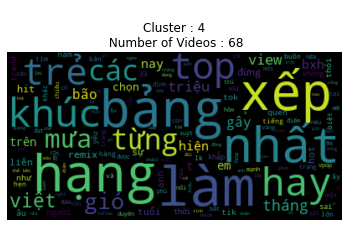

{'l√†m': 1.0, 'b·∫£ng': 0.8636363636363636, 'x·∫øp': 0.8636363636363636, 'h·∫°ng': 0.8636363636363636, 'nh·∫•t': 0.7727272727272727, 'kh√∫c': 0.7575757575757576, 'hay': 0.7272727272727273, 'top': 0.696969696969697, 'tr·∫ª': 0.6818181818181818, 't·ª´ng': 0.6515151515151515, 'c√°c': 0.6363636363636364, 'm∆∞a': 0.5151515151515151, 'gi√≥': 0.5, 'vi·ªát': 0.36363636363636365, 'th√°ng': 0.19696969696969696, 'tri·ªáu': 0.18181818181818182, 'view': 0.18181818181818182, 'g√¢y': 0.16666666666666666, 'b√£o': 0.16666666666666666, 'bxh': 0.15151515151515152, 'hi·ªán': 0.15151515151515152, 'nay': 0.15151515151515152, 't': 0.13636363636363635, 'tr√™n': 0.13636363636363635, 'em': 0.13636363636363635, 'ch·ªçn': 0.12121212121212122, 's·ª±': 0.10606060606060606, 'ƒë·ª´ng': 0.10606060606060606, 'remix': 0.10606060606060606, 'hit': 0.10606060606060606, 'tu·ªïi': 0.09090909090909091, 'li√™n': 0.09090909090909091, 'anh': 0.09090909090909091, 'hot': 0.09090909090909091, 'nam': 0.07575757575757576, 'ng∆∞·ªùi':

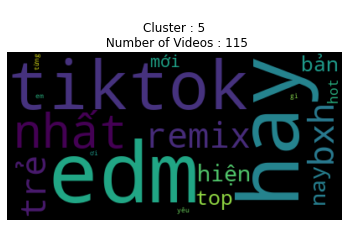

{'hay': 1.0, 'edm': 0.9956521739130435, 'tiktok': 0.9956521739130435, 'nh·∫•t': 0.9956521739130435, 'remix': 0.5043478260869565, 'bxh': 0.5, 'tr·∫ª': 0.5, 'hi·ªán': 0.5, 'nay': 0.5, 'top': 0.4956521739130435, 'b·∫£n': 0.4956521739130435, 'm·ªõi': 0.30434782608695654, 'hot': 0.19130434782608696, 'em': 0.004347826086956522, 'g√¨': 0.004347826086956522, '∆°i': 0.004347826086956522, 't·ª´ng': 0.004347826086956522, 'y√™u': 0.004347826086956522}


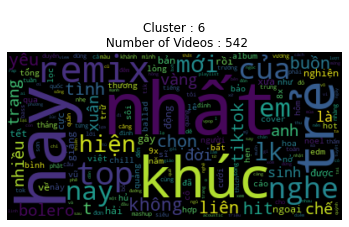

{'nh·∫•t': 1.0, 'hay': 0.8957528957528957, 'kh√∫c': 0.5598455598455598, 'tr·∫ª': 0.5135135135135135, 'remix': 0.2953667953667954, 'top': 0.21042471042471042, 'nghe': 0.1969111969111969, 'c·ªßa': 0.1969111969111969, 'nay': 0.1891891891891892, 'em': 0.17953667953667954, 'lk': 0.16023166023166024, 'm·ªõi': 0.15057915057915058, 'hi·ªán': 0.14671814671814673, 'kh√¥ng': 0.14092664092664092, 'hit': 0.13320463320463322, 'li√™n': 0.1274131274131274, 'bu·ªìn': 0.1274131274131274, 'ch·ªçn': 0.1274131274131274, 'y√™u': 0.12548262548262548, 't': 0.12355212355212356, 't√¨nh': 0.11969111969111969, 'tiktok': 0.11969111969111969, 'bolero': 0.10617760617760617, 'tr·∫°ng': 0.10424710424710425, 'anh': 0.10231660231660232, 'v√†ng': 0.09845559845559845, 'nhi·ªÅu': 0.09652509652509653, 'ch·∫ø': 0.0945945945945946, 'ƒë·ªùi': 0.0945945945945946, 'xu√¢n': 0.0888030888030888, 'l√†': 0.08108108108108109, 'sinh': 0.08108108108108109, 'nghi·ªán': 0.07915057915057915, 'ƒë∆∞·ª£c': 0.07915057915057915, 'h·∫£i': 0.0752

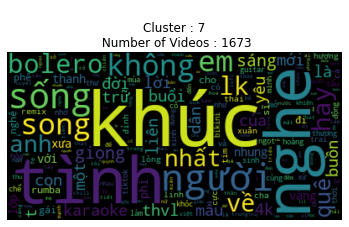

{'kh√∫c': 1.0, 't√¨nh': 0.7040816326530612, 'nghe': 0.6938775510204082, 'ng∆∞·ªùi': 0.6887755102040817, 's·ªëng': 0.6020408163265306, 'kh√¥ng': 0.5153061224489796, 'song': 0.5051020408163265, 'em': 0.49489795918367346, 'bolero': 0.45918367346938777, 'lk': 0.4336734693877551, 'hay': 0.42346938775510207, 'v·ªÅ': 0.40816326530612246, 'anh': 0.37755102040816324, 'nh·∫•t': 0.37244897959183676, 'qu√™': 0.35714285714285715, 'gi·ªçng': 0.3520408163265306, 's√°ng': 0.3469387755102041, 'ƒë·ªùi': 0.32653061224489793, 'bu·ªìn': 0.3112244897959184, 'l√†': 0.3010204081632653, 'l·ªùi': 0.2857142857142857, 'thvl': 0.2857142857142857, 'con': 0.2755102040816326, 'karaoke': 0.27040816326530615, 'm·∫´u': 0.2653061224489796, 'bu·ªïi': 0.2653061224489796, 'm·ªõi': 0.2602040816326531, 'c·ªßa': 0.2602040816326531, 'tr·ªØ': 0.2602040816326531, 'y√™u': 0.25, 'li√™n': 0.25, 't': 0.24489795918367346, 'd√¢n': 0.23979591836734693, '4k': 0.23979591836734693, 'm·ªôt': 0.23469387755102042, 'nhung': 0.23469387755102042

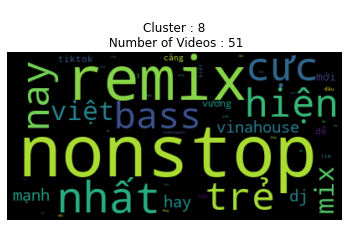

{'nonstop': 1.0, 'remix': 0.6847826086956522, 'nh·∫•t': 0.5869565217391305, 'c·ª±c': 0.532608695652174, 'tr·∫ª': 0.4891304347826087, 'hi·ªán': 0.4891304347826087, 'nay': 0.4891304347826087, 'bass': 0.4891304347826087, 'vi·ªát': 0.44565217391304346, 'mix': 0.44565217391304346, 'vinahouse': 0.44565217391304346, 'hay': 0.43478260869565216, 'm·∫°nh': 0.43478260869565216, 'dj': 0.43478260869565216, 'm·ªõi': 0.15217391304347827, 'v∆∞∆°ng': 0.11956521739130435, 'ƒë·∫ø': 0.10869565217391304, 'tiktok': 0.10869565217391304, 'cƒÉng': 0.09782608695652174, 's√†n': 0.043478260869565216, 'bi·∫øt': 0.03260869565217391, 't√¨m': 0.03260869565217391, 'ƒë√¢u': 0.03260869565217391, 'dunghoangpham': 0.010869565217391304, 'm·ªôt': 0.010869565217391304, 'b·∫≠c': 0.010869565217391304, 'qu√¢n': 0.010869565217391304, '√°o': 0.010869565217391304, 'c≈©': 0.010869565217391304, 't√¨nh': 0.010869565217391304, 'em': 0.010869565217391304, 'thay': 0.010869565217391304, 'l√≤ng': 0.010869565217391304, 'hot': 0.01086956521

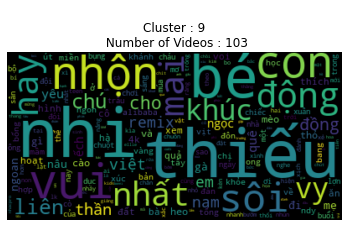

{'nhi': 1.0, 'thi·∫øu': 0.9922480620155039, 'b√©': 0.7364341085271318, 'vui': 0.4728682170542636, 'nh·ªôn': 0.4418604651162791, 'con': 0.40310077519379844, 's√¥i': 0.32558139534883723, 'ƒë·ªông': 0.32558139534883723, 'hay': 0.3178294573643411, 'mai': 0.3023255813953488, 'nh·∫•t': 0.29457364341085274, 'kh√∫c': 0.29457364341085274, 'vy': 0.2868217054263566, 'li√™n': 0.24031007751937986, 'ch√∫': 0.2248062015503876, 'cho': 0.16279069767441862, 'ƒë·ªìng': 0.13953488372093023, 'th·∫ßn': 0.12403100775193798, 'em': 0.10852713178294573, 'vi·ªát': 0.10852713178294573, 'nam': 0.10852713178294573, 'remix': 0.10852713178294573, 'qu√™': 0.06976744186046512, 'y√™u': 0.06976744186046512, '·∫øch': 0.06201550387596899, 'ng·ªçc': 0.06201550387596899, 'ngoan': 0.05426356589147287, 'g√†': 0.05426356589147287, 'n√¢u': 0.05426356589147287, 'm·∫π': 0.05426356589147287, 'ƒëi': 0.05426356589147287, 'heo': 0.046511627906976744, 'g√¨': 0.046511627906976744, 'v√†': 0.046511627906976744, 'c√†o': 0.04651162790697674

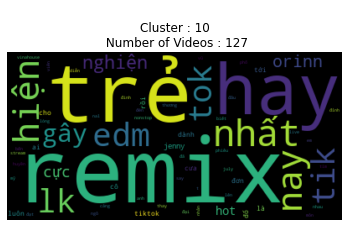

{'remix': 1.0, 'tr·∫ª': 0.8369565217391305, 'hay': 0.5942028985507246, 'nh·∫•t': 0.4927536231884058, 'hi·ªán': 0.4528985507246377, 'nay': 0.4528985507246377, 'edm': 0.4492753623188406, 'lk': 0.4384057971014493, 'tik': 0.4311594202898551, 'tok': 0.4311594202898551, 'g√¢y': 0.42028985507246375, 'nghi·ªán': 0.42028985507246375, 'orinn': 0.33695652173913043, 'c·ª±c': 0.27898550724637683, 'hot': 0.16666666666666666, 'jenny': 0.043478260869565216, 'c∆∞a': 0.036231884057971016, 'l√†': 0.036231884057971016, 'ƒë·ªï': 0.036231884057971016, 'r·ªìi': 0.036231884057971016, 't·ªõi': 0.036231884057971016, 'lu√¥n': 0.03260869565217391, 'tiktok': 0.028985507246376812, 'c√¥': 0.025362318840579712, 'ƒë∆°n': 0.025362318840579712, 'd√†nh': 0.025362318840579712, 'cho': 0.025362318840579712, 'ai': 0.025362318840579712, 'm·ªπ': 0.0036231884057971015, 'nh√¢n': 0.0036231884057971015, 'ƒëinh': 0.0036231884057971015, 'ƒë·∫°i': 0.0036231884057971015, 'v≈©': 0.0036231884057971015, 'cƒÉng': 0.0036231884057971015, 'n

In [101]:
drawWordCloud(temp_df,'title', stopwords)

0


C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


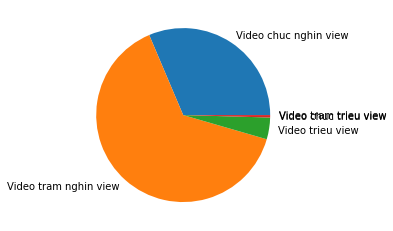

1


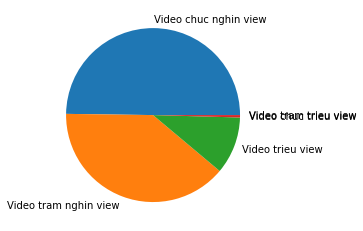

2


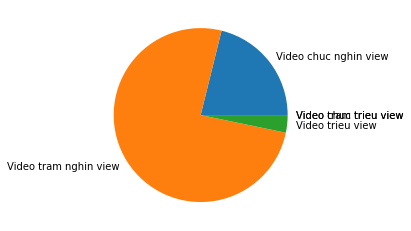

3


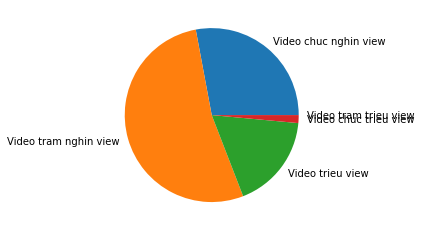

4


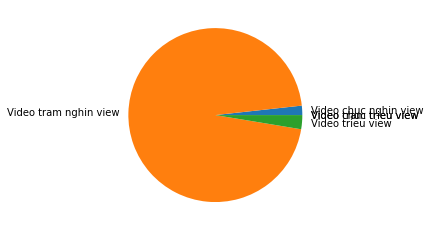

5


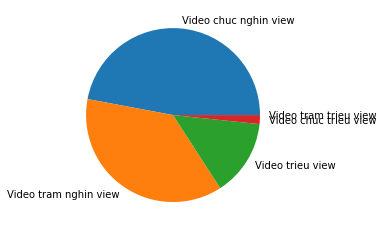

6


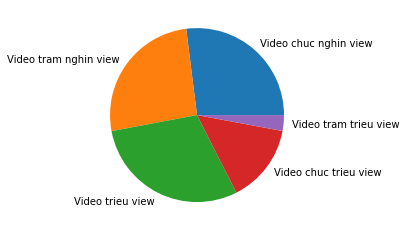

7


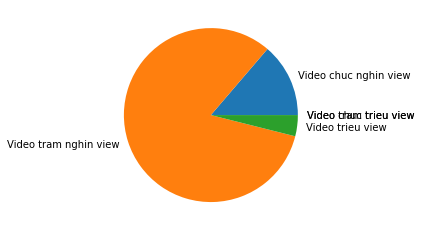

8


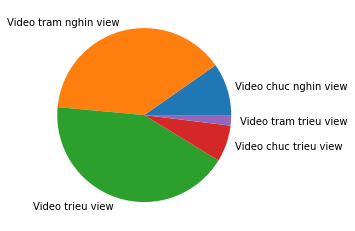

9


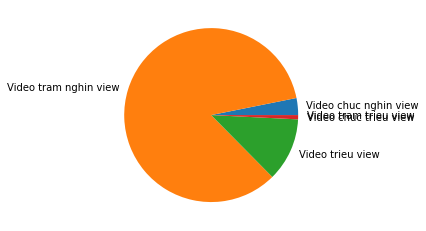

In [80]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [61]:
clustered_df = temp_df.groupby(['label']).sum()

In [67]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

viewCount    likeCount  durationInt
label                                       
0         89230736     515148.0       724423
1        118550098    2384239.0      2447635
2         41940541     232354.0       746225
3         53205338     155784.0       461525
4         51183052     447746.0       583905
5        429444263    2714349.0      3205259
6      23534411417  475847929.0      3167148
7         19900713     154324.0       223874
8        782986636    1703104.0       148220
9         90852421     356642.0       636690

In [81]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [82]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


S·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn: 3994
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi x·ª≠ l√Ω: (1673, 3994)
Xem c√°c t·ª´ trong t·ª´ ƒëi·ªÉn: {'top': 3220, 'ƒëang': 3732, 'g√¢y': 1185, 'b√£o': 414, 'tr√™n': 3269, 'c√°c': 660, 'bxh': 400, 'nh∆∞': 2219, 'm·ªôt': 2088, 'ng∆∞·ªùi': 2177, 'd∆∞ng': 900, 'l·∫°': 1803, 'tho√°ng': 3090, 'qua': 2542, 'h·ªça': 1359, '·ª©c': 3932, 'dratellingmontee': 849, 'prod': 2521, 'tuanuki': 3311, 'animate': 187, 'sino': 2840, 'th∆∞': 3133, 'gi√£n': 1119, 't√¥i': 3362, 'season': 2756, 'n·ª≠a': 2319, 'h·ªìn': 1365, 'th∆∞∆°ng': 3134, 'ƒëau': 3733, 'thanh': 3066, 'lan': 1654, 'liveshow': 1716, 'h·∫£i': 1349, 'ngo·∫°i': 2156, 'tr√∫c': 3277, 'sinh': 2836, 'entertainment': 952, '60s': 86, 'b√∫p': 431, 'b√™': 419, 'tr√≤': 3273, 'ch∆°i': 546, 'con': 606, 'm·ª±c': 2094, 'squid': 2911, 'game': 1076, 'nh·∫£y': 2222, 'c·ª±c': 718, 'sung': 2954, 'c√πng': 678, 'trai': 3232, 'ƒë·∫πp': 3814, 'rise': 2648, 'above': 122, 'tripledmai': 3247, 'mr': 2017, 'v·ªãt': 3546, 'yomost': 3680

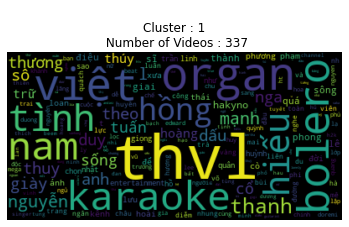

{'thvl': 1.0, 'organ': 0.4888888888888889, 'vi·ªát': 0.4444444444444444, 'bolero': 0.4222222222222222, 'karaoke': 0.35555555555555557, 'nam': 0.35555555555555557, 't√¨nh': 0.3111111111111111, 'hi·∫øu': 0.28888888888888886, 'h·ªìng': 0.2222222222222222, 'thanh': 0.2222222222222222, 'nguy·ªÖn': 0.2, 'm·∫°nh': 0.2, 'anh': 0.17777777777777778, 'thuy': 0.17777777777777778, 'nga': 0.17777777777777778, 'l': 0.17777777777777778, 'th∆∞∆°ng': 0.17777777777777778, 'theo': 0.17777777777777778, 'd·∫•u': 0.17777777777777778, 'gi√†y': 0.17777777777777778, 's√¥': 0.17777777777777778, 'duy': 0.17777777777777778, 's·ªëng': 0.15555555555555556, 'tu·∫•n': 0.15555555555555556, 'c·ªï': 0.15555555555555556, 'ho√†ng': 0.15555555555555556, 'tr·ªØ': 0.15555555555555556, 'th√∫y': 0.15555555555555556, 'hakyno': 0.15555555555555556, 'sƒ©': 0.13333333333333333, 'giai': 0.13333333333333333, 'ƒëi·ªáu': 0.13333333333333333, 's√¥ng': 0.13333333333333333, 'phong': 0.13333333333333333, 'qu√°': 0.13333333333333333, 'l√™':

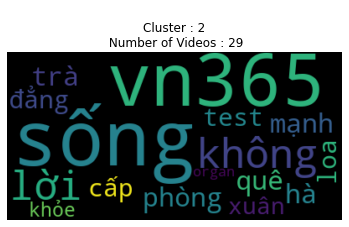

{'s·ªëng': 1.0, 'vn365': 0.9565217391304348, 'kh√¥ng': 0.13043478260869565, 'l·ªùi': 0.13043478260869565, 'ph√≤ng': 0.043478260869565216, 'tr√†': 0.043478260869565216, 'qu√™': 0.043478260869565216, 'm·∫°nh': 0.043478260869565216, 'h√†': 0.043478260869565216, 'ƒë·∫≥ng': 0.043478260869565216, 'c·∫•p': 0.043478260869565216, 'test': 0.043478260869565216, 'loa': 0.043478260869565216, 'xu√¢n': 0.043478260869565216, 'kh·ªèe': 0.043478260869565216, 'organ': 0.043478260869565216}


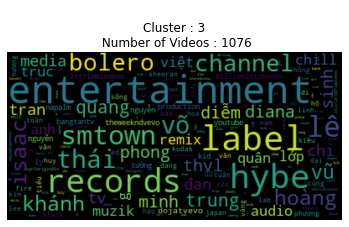

{'entertainment': 1.0, 'label': 0.7692307692307693, 'hybe': 0.7435897435897436, 'records': 0.717948717948718, 'l√™': 0.5384615384615384, 'smtown': 0.48717948717948717, 'th√°i': 0.4358974358974359, 'v√µ': 0.41025641025641024, 'channel': 0.38461538461538464, 'bolero': 0.38461538461538464, 'isaac': 0.358974358974359, 'kh√°nh': 0.3076923076923077, 'ho√†ng': 0.3076923076923077, 'v≈©': 0.2564102564102564, 'trung': 0.20512820512820512, 'quang': 0.20512820512820512, 'sinh': 0.1794871794871795, 'di·ªÖm': 0.1794871794871795, 'minh': 0.1794871794871795, 'thvl': 0.1794871794871795, 'phong': 0.1794871794871795, 'diana': 0.1794871794871795, 'tv': 0.15384615384615385, 'chi': 0.15384615384615385, 'tran': 0.15384615384615385, 'ƒëan': 0.15384615384615385, 'media': 0.15384615384615385, 'truc': 0.1282051282051282, 'chill': 0.1282051282051282, 'anh': 0.1282051282051282, 'g': 0.1282051282051282, 'muzik': 0.1282051282051282, 'l·ªõp': 0.1282051282051282, 'audio': 0.1282051282051282, 'vi·ªát': 0.12820512820512

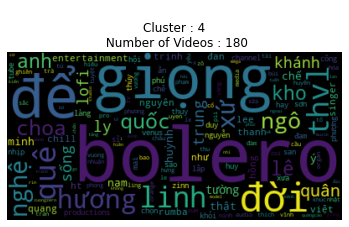

{'bolero': 1.0, 'gi·ªçng': 0.9310344827586207, 'ƒë·ªÉ': 0.896551724137931, 'ƒë·ªùi': 0.896551724137931, 'qu√™': 0.4827586206896552, 'thvl': 0.4482758620689655, 'linh': 0.41379310344827586, 'h∆∞∆°ng': 0.3448275862068966, 'x·ª©': 0.3103448275862069, 'ngh·ªá': 0.3103448275862069, 'ng√¥': 0.27586206896551724, 'choa': 0.2413793103448276, 'qu·ªëc': 0.2413793103448276, 'l√™': 0.20689655172413793, 'anh': 0.20689655172413793, 'kho': 0.20689655172413793, 'qu√¢n': 0.20689655172413793, 'kh√°nh': 0.1724137931034483, 'trung': 0.1724137931034483, 's·ªëng': 0.1724137931034483, 'lofi': 0.1724137931034483, 'ly': 0.1724137931034483, 't∆∞·ªùng': 0.1724137931034483, 'nam': 0.13793103448275862, 'minh': 0.13793103448275862, '√Ω': 0.13793103448275862, 'hu·ª≥nh': 0.13793103448275862, 'th·∫≠t': 0.13793103448275862, 'ch·∫ø': 0.13793103448275862, 'vi·ªát': 0.10344827586206896, 'ƒëan': 0.10344827586206896, 'nguy√™n': 0.10344827586206896, 'h·ªìng': 0.10344827586206896, 'entertainment': 0.10344827586206896, 'nh∆∞': 

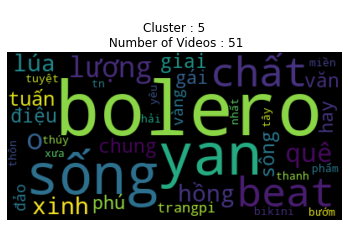

{'bolero': 1.0, 'yan': 0.56, 's·ªëng': 0.52, 'beat': 0.24, 'ch·∫•t': 0.24, 'l∆∞·ª£ng': 0.24, 'o': 0.24, 'qu√™': 0.2, 'h·ªìng': 0.16, 'l√∫a': 0.16, 'xinh': 0.16, 'tu·∫•n': 0.12, 'chung': 0.12, 'giai': 0.12, 'ƒëi·ªáu': 0.12, 's√¥ng': 0.12, 'vƒÉn': 0.12, 'ph√∫': 0.12, 'g√°i': 0.12, 'hay': 0.12, 'ƒë·∫£o': 0.08, 'v√†ng': 0.08, 'trangpi': 0.08, 'bikini': 0.04, 'y√™u': 0.04, 'mi·ªÅn': 0.04, 't√¢y': 0.04, 'tn': 0.04, 'thanh': 0.04, 'h·∫£i': 0.04, 'th√¥n': 0.04, 'nh·∫•t': 0.04, 'th√∫y': 0.04, 'x∆∞a': 0.04, 'tuy·ªát': 0.04, 'ph·∫©m': 0.04, 'b∆∞·ªõm': 0.04}


In [90]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(wordcloud.words_)

0


C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
C:\Users\Admin\AppData\Local\Temp/ipykernel_23172/4254363901.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


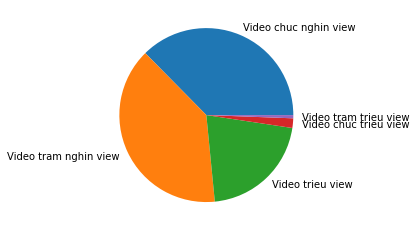

1


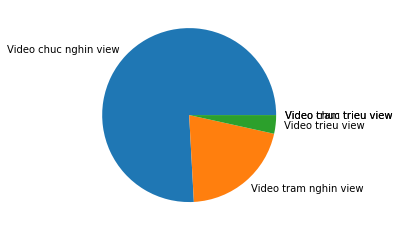

2


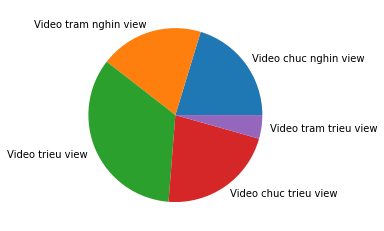

3


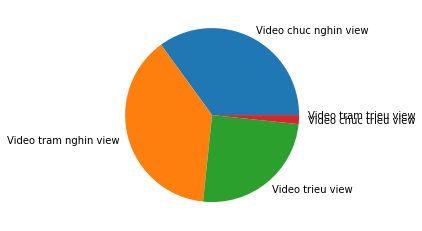

4


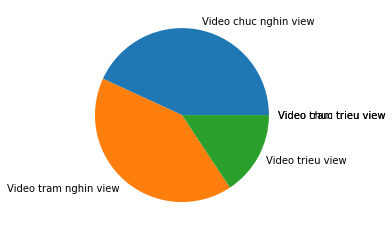

In [84]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [87]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      994396138
likeCount      7257261.0
durationInt      2442637
dtype: object

In [88]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      22540015279
likeCount      468590668.0
durationInt         724511
dtype: object

In [ ]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

H·ªça ·ª®c - DraTelling x MontEe (Prod. Tuanuki - Animate. SiNo)
√Çm Nh·∫°c & T√¥i Season 2 - N·ª¨A H·ªíN TH∆Ø∆†NG ƒêAU | THANH LAN | Liveshow H·∫£i Ngo·∫°i Tr√∫c Sinh Entertainment
60S √ÇM NH·∫†C - B√∫p B√™ Tr√≤ Ch∆°i Con M·ª±c Squid Game Nh·∫£y C·ª±c Sung c√πng Trai ƒê·∫πp
[Official MV] RISE ABOVE | TripleD x Mai √Çm Nh·∫°c x Mr.V·ªãt | Yomost VFL Winter 2021 Theme Song
√Çm Nh·∫°c & T√¥i - NH·∫†C V≈® TR∆Ø·ªúNG | Loan Ch√¢u, M·ªπ V√¢n | Liveshow H·∫£i Ngo·∫°i | Tr√∫c Sinh Entertainment
√ù NI·ªÜM - COLDZY - MAI √ÇM NH·∫†C (LYRICS) RAP VI·ªÜT M√ôA 2 T·∫¨P 7 - V√íNG ƒê·ªêI ƒê·∫¶U
√Çm Nh·∫°c & T√¥i, Season 2 | N·ªñI NI·ªÄM | NH∆Ø MAI | Live Show H·∫£i Ngo·∫°i | Tr√∫c Sinh Entertainment
√Çm Nh·∫°c & T√¥i - Happy Father‚Äôs Day 2021 - "Nh·ªõ ƒê·∫øn L·ªùi Cha‚Äù | Tr√∫c Sinh Entertainment
TOP Nh·ªØng B√†i H√°t ƒêANG G√ÇY B√ÉO Tr√™n C√°c BXH √Çm Nh·∫°c | Ng∆∞·ªùi L·∫° Tho√°ng Qua, H·∫πn Ki·∫øp Sau
C√¢u chuy·ªán √¢m nh·∫°c #1 II C√° Heo v·ªõi √¢m nh·∫°c II thedien
khi n·ªØ nh·∫°c c√¥ng ph√™u c

In [ ]:
print(wordcloud.words_)

{'h·ªìng': 1.0, 'hybe': 0.875, 'labels': 0.875, 'giai': 0.75, 'ƒëi·ªáu': 0.75, 's√¥ng': 0.75, 'remix': 0.5, 's·ªëng': 0.25, 'lee': 0.25, 'bangtantv': 0.25, 'v√†ng': 0.25, 'tr·ªØ': 0.25, 't√¨nh': 0.25, 'hoa': 0.25, 'd·∫°i': 0.25, 'muzik': 0.25, 'petersounds': 0.125, 'orinn': 0.125, 'th√≠ch': 0.125, 'nghe': 0.125, 'huy': 0.125, 'thu·ª≥': 0.125, 'dung': 0.125, 'bolero': 0.125, 'th√°i': 0.125, 'qu·ª≥nh': 0.125, 'dollypartonvevo': 0.125, "spinnin'": 0.125, 'records': 0.125, 'yang': 0.125, 'tvr': 0.125, 'eltonjohnvevo': 0.125, 'chrisbrownvevo': 0.125, 'alikiba': 0.125, 'm·ªçt': 0.125, 'edm': 0.125, 'mrshin': 0.125, 'chill': 0.125, 'hq': 0.125, 'h·∫≠u': 0.125, 'b√©': 0.125, "fin'd": 0.125, 'qu√™': 0.125, 'm√¨nh': 0.125, 'tilo': 0.125, 'amp': 0.125, 'theory': 0.125, 'gavin': 0.125, 'magnus': 0.125, 'littlemixvevo': 0.125}
